<a href="https://colab.research.google.com/github/rohitdanda/DeepLearning_DataSets/blob/master/CustomAnimalDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


we unzip the zip file locally 

In [0]:
import os
from zipfile import ZipFile
with ZipFile('/content/drive/My Drive/CATS_DOGS.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()

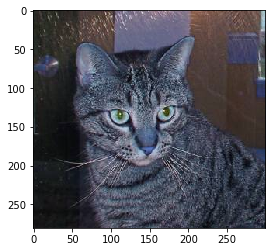

In [3]:
import matplotlib.pyplot as plt
import cv2

image = cv2.imread("CATS_DOGS/train/CAT/1.jpg")
plt.imshow(image)

We use the Keras ImageGenerator to make an Data Augementation to reuse the same data in number of different ways 

In [4]:
from keras.preprocessing.image import ImageDataGenerator

imageGenerator = ImageDataGenerator(rotation_range=40,width_shift_range=0.3,height_shift_range=0.3,shear_range=0.4,zoom_range=0.3,horizontal_flip=True,rescale=1/255)

Using TensorFlow backend.


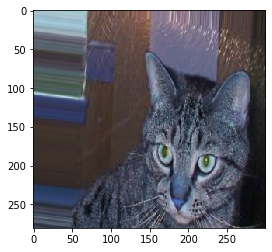

In [5]:
test = imageGenerator.random_transform(image)
plt.imshow(test)

now we will apply this image generator to train datasets 

In [6]:
train_gen=imageGenerator.flow_from_directory("CATS_DOGS/train/",target_size=(100,100),class_mode='binary',batch_size=16)
test_gen=imageGenerator.flow_from_directory("CATS_DOGS/test/",target_size=(100,100),class_mode='binary',batch_size=16)



Found 18743 images belonging to 2 classes.
Found 6251 images belonging to 2 classes.


In [7]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout

model = Sequential()
model.add(Conv2D(filters=64,kernel_size=(4,4),activation='relu',input_shape=(100,100,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(4,4),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(4,4),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(4,4),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 97, 97, 64)        3136      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        65600     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 19, 19, 64)        65600     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 9, 9, 64)          0         


In [8]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [11]:
model.fit_generator(train_gen,epochs=100,verbose=1,validation_data=test_gen,validation_steps=64,steps_per_epoch=150)

Epoch 1/100
150/150 [==============================] - 20s 132ms/step - loss: 0.6930 - acc: 0.5021 - val_loss: 0.6927 - val_acc: 0.5215
Epoch 2/100
150/150 [==============================] - 18s 123ms/step - loss: 0.6933 - acc: 0.5104 - val_loss: 0.6942 - val_acc: 0.4863
Epoch 3/100
150/150 [==============================] - 18s 123ms/step - loss: 0.6932 - acc: 0.5108 - val_loss: 0.6941 - val_acc: 0.4922
Epoch 4/100
150/150 [==============================] - 19s 124ms/step - loss: 0.6921 - acc: 0.5075 - val_loss: 0.6927 - val_acc: 0.5078
Epoch 5/100
150/150 [==============================] - 18s 123ms/step - loss: 0.6925 - acc: 0.4998 - val_loss: 0.6943 - val_acc: 0.4932
Epoch 6/100
150/150 [==============================] - 18s 123ms/step - loss: 0.6909 - acc: 0.5096 - val_loss: 0.7261 - val_acc: 0.4912
Epoch 7/100
150/150 [==============================] - 19s 125ms/step - loss: 0.6938 - acc: 0.5167 - val_loss: 0.6935 - val_acc: 0.4946
Epoch 8/100
107/150 [====================>......

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

150/150 [==============================] - 19s 124ms/step - loss: 0.6929 - acc: 0.4846 - val_loss: 0.6876 - val_acc: 0.4824
Epoch 9/100
150/150 [==============================] - 18s 123ms/step - loss: 0.6940 - acc: 0.5021 - val_loss: 0.6923 - val_acc: 0.5176
Epoch 10/100
150/150 [==============================] - 19s 123ms/step - loss: 0.6914 - acc: 0.5121 - val_loss: 0.6913 - val_acc: 0.5547
Epoch 11/100
150/150 [==============================] - 18s 123ms/step - loss: 0.6861 - acc: 0.5267 - val_loss: 0.6852 - val_acc: 0.5479
Epoch 12/100
150/150 [==============================] - 19s 124ms/step - loss: 0.6916 - acc: 0.5242 - val_loss: 0.6930 - val_acc: 0.5088
Epoch 13/100
150/150 [==============================] - 19s 124ms/step - loss: 0.6940 - acc: 0.5023 - val_loss: 0.6927 - val_acc: 0.5015
Epoch 14/100
150/150 [==============================] - 19s 124ms/step - loss: 0.6907 - acc: 0.5238 - val_loss: 0.6882 - val_acc: 0.5557
Epoch 15/100
150/150 [==============================] -

In [14]:
nb_samples = len(test_gen)
predict = model.predict_generator(test_gen,steps=nb_samples,verbose=1)
from sklearn.metrics import classification_report

391/391 [==============================] - 35s 89ms/step


array([[0.41361123],
       [0.26688868],
       [0.77493703],
       ...,
       [0.6572542 ],
       [0.5036863 ],
       [0.37134677]], dtype=float32)